In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [ ]:
%cd drive/MyDrive/Colab\ Notebooks/data

/content/drive/MyDrive/Colab Notebooks/data


In [ ]:
dataset1 = pd.read_csv('dataset_1.csv')
dataset2 = pd.read_csv('dataset_2.csv')

### **Check articles missing desired XML format:**

In [ ]:
json_report = pd.read_csv('json_report_1.csv', names=['ItemID','ArticleSet','isJSON','DOI'])
json_report.head()

,ItemID,ArticleSet,isJSON,DOI
0,4288352,ArticleSet3,1,10.1186/s40425-016-0151-z
1,4288295,ArticleSet3,0,10.1007/s00280-016-3190-8
2,4288431,ArticleSet3,1,10.1186/s12887-016-0734-3
3,4288417,ArticleSet3,1,10.1186/s40425-016-0114-4
4,4288429,ArticleSet3,0,10.1007/s00380-016-0847-5


In [ ]:
json_report['isJSON'].sum()

2969

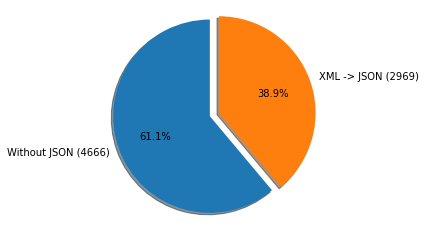

In [ ]:
labels = 'Without JSON (4666)', 'XML -> JSON (2969)'
sizes = [len(json_report) - json_report['isJSON'].sum(), json_report['isJSON'].sum()]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### **Check for NULL in DOI (Digital Object Identifier):**

In [ ]:
nulldoi = dataset1[dataset1['DOI'].isnull()]
nulldoi.head(3)

,ItemID,ArticleSet,FileLocation,Adnm,NarrativeText,VancouverCitation,NewsDescriptors,DOI
129,4347060,ArticleSet5,\\SNTPScontacqXML\contacqXML$\ArticleSet5\4347...,3222696,"In a phase&#160;III trial (NCT00508274), three...","Xu BH, Jiang ZF, Chua D, Shao ZM, Luo RC, Wang...","Capecitabine,Lapatinib,Haemoptysis,Neutropenia...",NaN
253,4351872,ArticleSet3,\\SNTPScontacqXML\contacqXML$\ArticleSet3\4351...,3226339,A 46-year-old woman with hypertension associat...,"Mazza A, Ravenni R, Armigliato M, Rossetti C, ...","Venlafaxine,Hypertension",NaN
371,4527200,ArticleSet5,\\SNTPScontacqXML\contacqXML$\ArticleSet5\4527...,3232009,"An 81-year-old woman developed nausea, malaise...","Passen E, Marks A, Palmer P, Poludasu R, Khedk...","Regadenoson,Nausea,Malaise,Intravenous,Elderly...",NaN


Total items with **NULL** DOI:

In [ ]:
len(nulldoi)

111

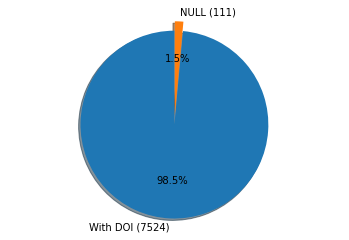

In [ ]:
labels = 'With DOI (7524)', 'NULL (111)'
sizes = [len(dataset1) - len(nulldoi), len(nulldoi)]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

**1.5%** has NULL DOI out of **7635** items.

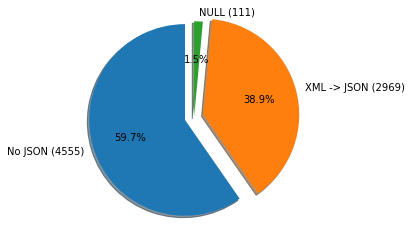

In [ ]:
labels = 'No JSON (4555)', 'XML -> JSON (2969)', 'NULL (111)'
sizes = [len(dataset1) - len(nulldoi) - json_report['isJSON'].sum(), json_report['isJSON'].sum(), len(nulldoi)]
explode = (0.1, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### **Check if any item is available in both Articleset:**

In [ ]:
dataset1.join(dataset2, on="ItemID", how="inner", lsuffix="_ds1", rsuffix="_ds2")

,ItemID,ItemID_ds1,ArticleSet_ds1,FileLocation_ds1,Adnm_ds1,NarrativeText_ds1,VancouverCitation_ds1,NewsDescriptors_ds1,DOI_ds1,ItemID_ds2,ArticleSet_ds2,FileLocation_ds2,Adnm_ds2,NarrativeText_ds2,VancouverCitation_ds2,NewsDescriptors_ds2,DOI_ds2


**Conclusion**: No overlap.

### **Check for Articles Not Found:**

In [ ]:
html_report = pd.read_csv('html_report_1.csv')
html_report.head()

,ItemID,ArticleSet,is_html,is_article,DOI
0,4288352,ArticleSet3,0,0,10.1186/s40425-016-0151-z
1,4288295,ArticleSet3,1,1,10.1007/s00280-016-3190-8
2,4288431,ArticleSet3,0,0,10.1186/s12887-016-0734-3
3,4288417,ArticleSet3,0,0,10.1186/s40425-016-0114-4
4,4288429,ArticleSet3,1,1,10.1007/s00380-016-0847-5


In [ ]:
# HTML found
html_report['is_html'].sum()

4666

In [ ]:
# article found
html_report['is_article'].sum()

3856

In [ ]:
# article not found
not_found = html_report['is_html'].sum() - html_report['is_article'].sum() - len(nulldoi)
not_found

699

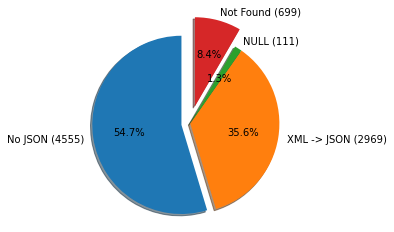

In [ ]:
labels = 'No JSON (4555)', 'XML -> JSON (2969)', 'NULL (111)', 'Not Found (699)'
sizes = [len(dataset1) - len(nulldoi) - json_report['isJSON'].sum(), json_report['isJSON'].sum(), len(nulldoi), not_found]
explode = (0.1, 0, 0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()